In [2]:
from widetrax import Spectram as sp
from widetrax import DataPreprocessing as dp
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
%reload_ext autoreload
%autoreload 2

In [3]:
# Required Variables

area = [16, 32, 19.5, 37.5]
resolution = 0.1 
start_date = '20230801'  # the desired start date in YYYYMMDD format
end_date = '20230805'  

In this example, we use the SWOT data (L3_LR_SSH_Expert) version 1.0 to demonstrate the application of the widetrax model for calculating wave spectrum in the Mediterranean region.

In [4]:
database_path = '/work/HELPDESK_SWOTLR/commun/data/swot/L3_LR_SSH/v1_0/Basic/'

matching_folders = dp.check_directory(database_path, start_date, end_date)
combined_datasets = dp.extract_xarrays_by_time(database_path, start_date, end_date, area)

In [5]:
# Handling nan values
has_converged, filled_datasets = dp.fill_nan(combined_datasets)

In [6]:
# Extract segments
segments_dict = sp.retrieve_segments(filled_datasets,FileType="NetCDF")

In [7]:
# Compute PSD
psd_dict, freqs_dict = sp.calculate_psd(segments_dict)
psd_mean, freqs_mean = sp.psd_mean_and_freq(psd_dict,freqs_dict)

/home/mp/ouhecha/Work24/codes/CH1/widetrax/notebooks/../widetrax/Spectram.py:221: RuntimeWarning: divide by zero encountered in divide
  ax2 = ax.secondary_xaxis("bottom", functions=(lambda x: 1 / x, lambda x: 1 / x))


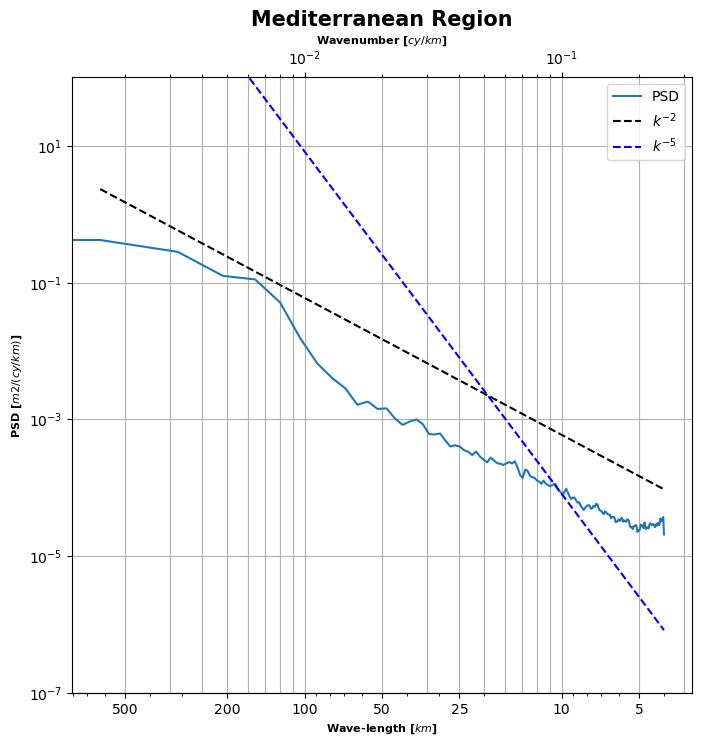

In [8]:
# Plot
fig, ax_ = plt.subplots(1, 1, figsize=(8, 8))
title = 'Mediterranean Region'
sp.plot_psd(ax_, freqs_mean, psds = psd_mean,psd_labels = "PSD",unit = "m2",title=title)